### The Breast Ultrasound Dataset includes 780 images of breast ultrasounds from 600 female patients, collected in 2018. The images are in PNG format, with an average size of 500*500 pixels, and are categorized into normal, benign, and malignant classes

https://www.kaggle.com/datasets/aryashah2k/breast-ultrasound-images-dataset

In [4]:
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

## input paths

In [5]:
input_ben = '../input/Dataset_BUSI_with_GT/benign/'
input_ben_proc = '../input/Dataset_BUSI_with_GT/benign_processed/'
input_mali = '../input/Dataset_BUSI_with_GT/malignant/'
input_mali_proc = '../input/Dataset_BUSI_with_GT/malignant_processed/'
input_norm = '../input/Dataset_BUSI_with_GT/normal/'


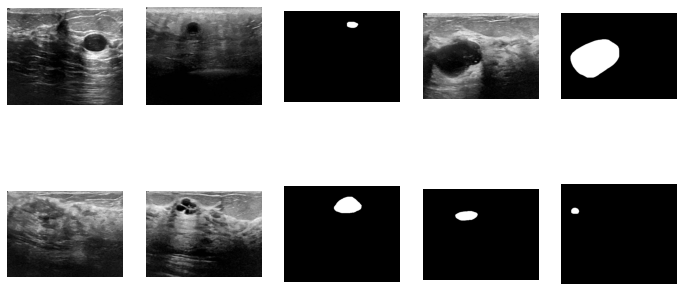

In [6]:
def plot_random_images(path):
    """
    This function takes a path and plots 10 random images from that path.
   
    """
    # Get a list of all the image files in the directory
    image_files = os.listdir(path)
    
    # Select 10 random images from the list
    random_images = np.random.choice(image_files, 10, replace=False)
    
    # Plot the images
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12,6))
    for i, ax in enumerate(axes.flat):
        image = Image.open(os.path.join(path, random_images[i]))
        ax.imshow(image)
        ax.set_axis_off()
    
    plt.show()
    
plot_random_images(input_ben)

## Prepare the images for loading

In [8]:
def segrigate_image(input_path):
    """
    Segregates the images and masks from the given input path.

    """
    image = []
    image_mask = []
    for x in sorted(os.listdir(input_path)):
        if x.endswith("png"):
            if "mask" in x:   
                image_mask.append(x)
            else:
                image.append(x)
    print(f"Images: {len(image)}, masks: {len(image_mask)}")
    return image, image_mask

In [9]:
print("Normal Class")
normal_image, normal_image_mask  = segrigate_image(input_norm)
print("Benign Class")
benign_image, benign_image_mask = segrigate_image(input_ben)
print("Maliganent Class")
mali_image, mali_image_mask = segrigate_image(input_mali)

Normal Class
Images: 133, masks: 133
Benign Class
Images: 437, masks: 454
Maliganent Class
Images: 210, masks: 211


### Either some images are missing masks or some images have multiple masks

In [5]:
def check_mask_avail(image_list, mask_list):
    """
    checks if the image and its corosponding mask is available or not
    """
    with_mask = []
    without_mask = []
    for x in image_list:
        image_name = x[:-4]
        if image_name+"_mask.png" in mask_list:
            with_mask.append(x)
        else:
            without_mask.append(x)
            
    print(f"with mask {len(with_mask)}, : without mask {len(without_mask)}")
        
    return with_mask, without_mask

_,_ = check_mask_avail(benign_image, benign_image_mask)

with mask 437, : without mask 0


In [6]:
_,_ = check_mask_avail(normal_image, normal_image_mask)

with mask 133, : without mask 0


In [7]:
_,_ = check_mask_avail(mali_image, mali_image_mask)

with mask 210, : without mask 0


### finding images with multiple masks

In [8]:
def find_multi_mask(image_list, mask_list):
    """
    Returns a sorted list of masks that correspond to images with multiple masks.
    """
    multi_mask = {}
    for img in image_list:
        img_name = img[:-4]
        img_masks = [mask for mask in mask_list if f"{img_name}_mask_" in mask]
        
        if len(img_masks) > 0:
            multi_mask[img_name] = img_masks
    multi_mask_count = len(multi_mask)
    print(f"There are {multi_mask_count} images with multiple masks.")
    
    return multi_mask

ben_multi_mask_dict = find_multi_mask(benign_image, benign_image_mask)

There are 16 images with multiple masks.


In [9]:
norm_multi_mask_dict = find_multi_mask(normal_image, normal_image_mask)

There are 0 images with multiple masks.


In [10]:
mali_multi_mask_dict = find_multi_mask(mali_image,mali_image_mask)

There are 1 images with multiple masks.


### merging the multiple masks and saving them in new directory

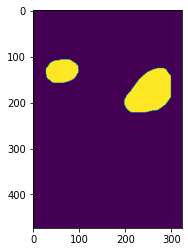

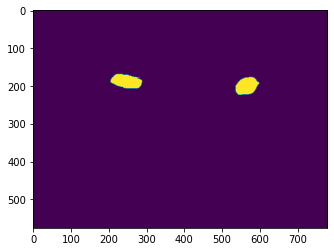

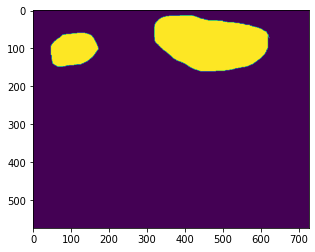

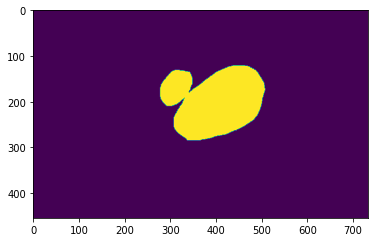

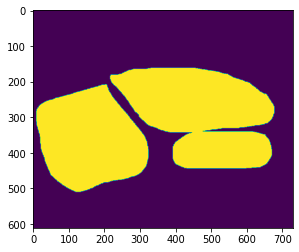

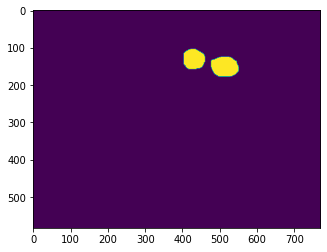

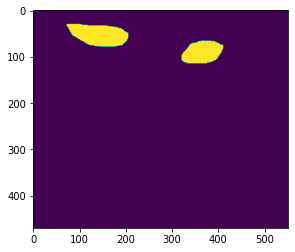

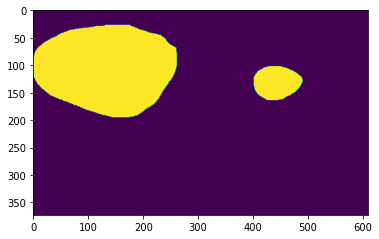

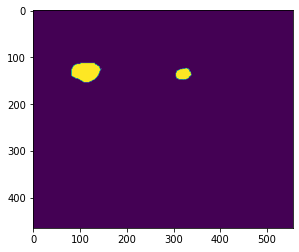

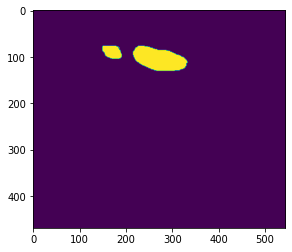

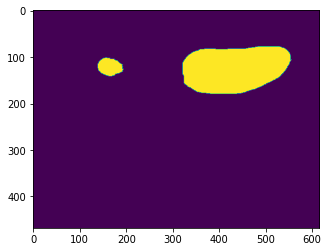

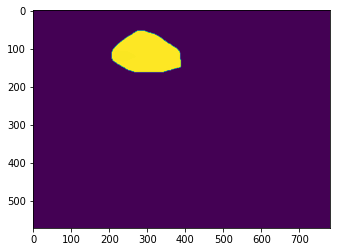

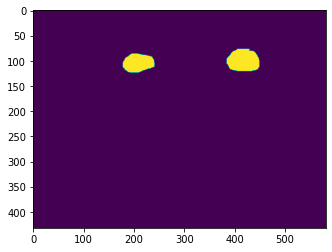

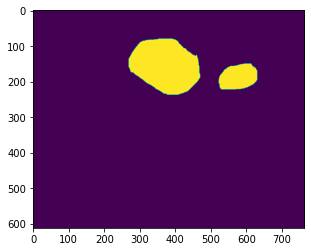

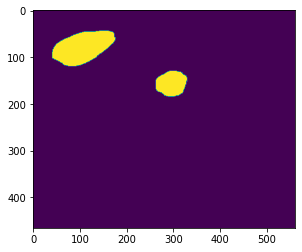

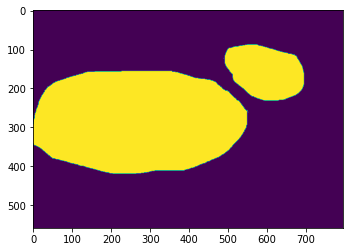

In [11]:
def save_processed_mask(multi_mask_dict,load_path, save_path):
    """
       Merges multiple masks for each image and saves the merged mask in the specified path.
    """
    for key, value in multi_mask_dict.items():
        
        mask1 = load_path+key+"_mask.png"
        mask2 = load_path+value[0]

        mask1 = cv2.imread(mask1, cv2.IMREAD_GRAYSCALE)
        mask2 = cv2.imread(mask2, cv2.IMREAD_GRAYSCALE)

        merged_mask = np.add(mask1, mask2)

        if len(value)>1:
            mask3 = load_path+value[1]
            merged_mask = np.add(merged_mask, cv2.imread(mask3, cv2.IMREAD_GRAYSCALE))
        
        save_img_path = save_path+key+"_mask.png"
        
        plt.imshow(merged_mask)
        plt.show()
        cv2.imwrite(save_img_path, merged_mask)
    return None

save_processed_mask(ben_multi_mask_dict, input_ben, input_ben_proc)

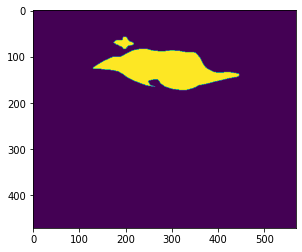

In [12]:
save_processed_mask(mali_multi_mask_dict, input_mali, input_mali_proc)


In [13]:
def save_processed(input_path, input_proc):
    
    """
    Loads images and masks from the input path, saves them to the specified processed path, and returns nothing.
    """
    for image in sorted(os.listdir(input_path)):
        if "_mask" not in image and not image.startswith('.'):
            image_name = image[:-4]
            image_mask = image_name+"_mask.png"    
            img = cv2.imread(input_path + image)
            mask = cv2.imread(input_path +image_mask)
            if image_name not in os.listdir(input_proc):
                cv2.imwrite(input_proc+image, img)
            if image_mask not in os.listdir(input_proc):
                cv2.imwrite(input_proc+image_mask, mask)
    return None

save_processed(input_ben, input_ben_proc)

In [14]:
save_processed(input_mali, input_mali_proc)

Images: 437, masks: 437


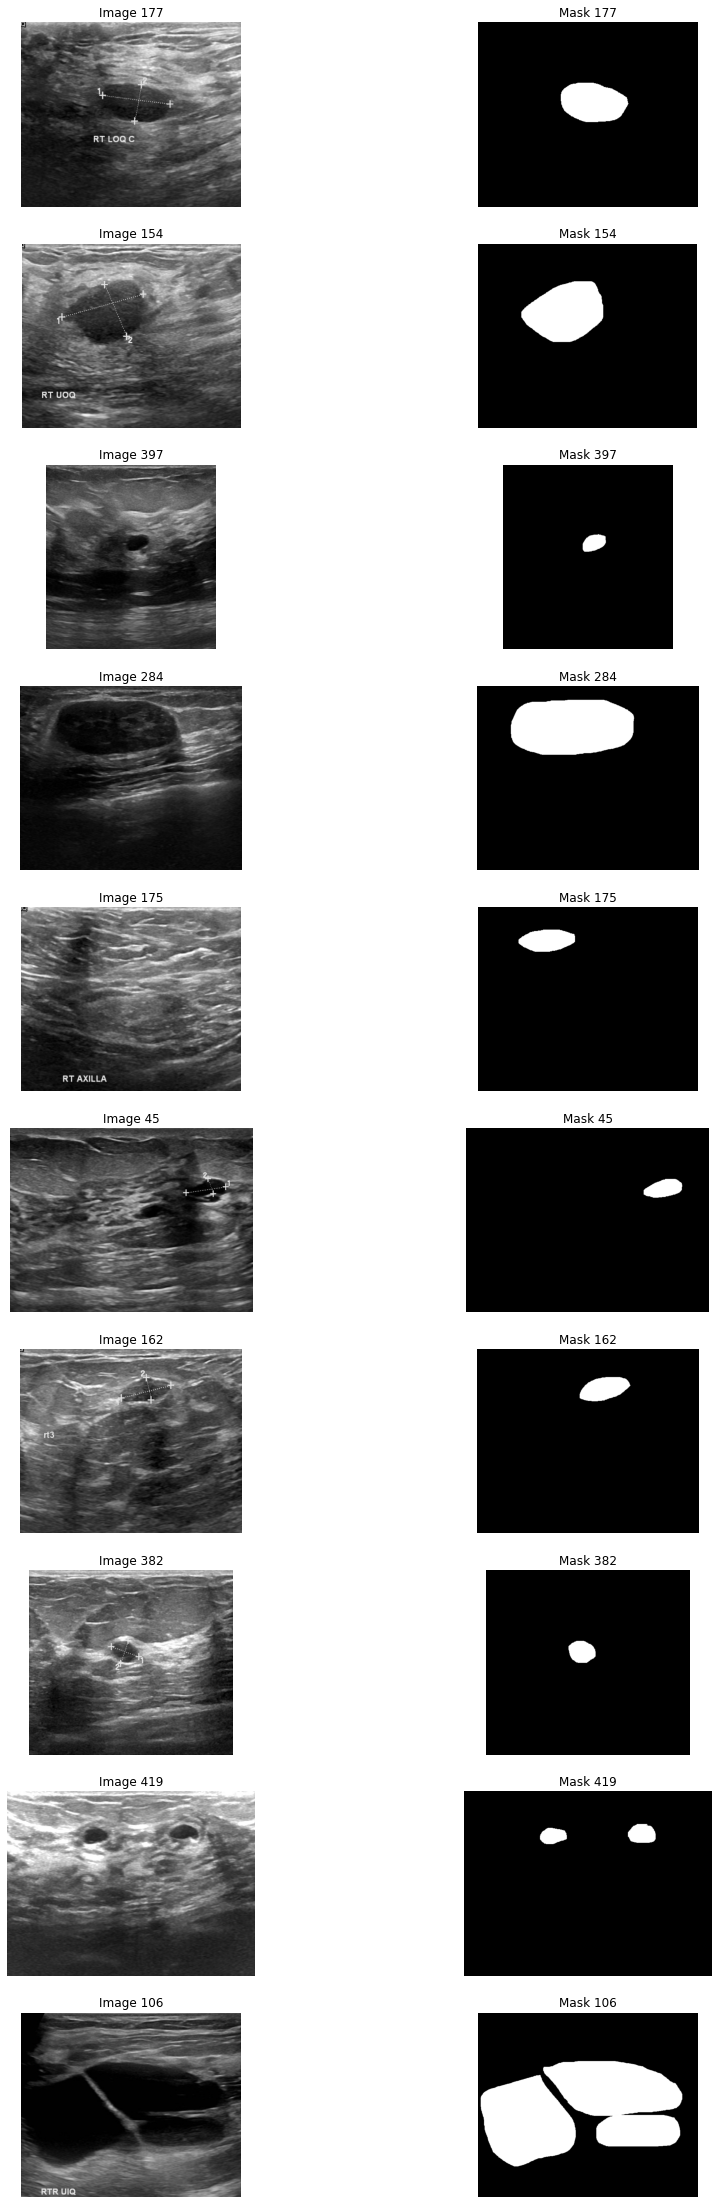

In [20]:
def show_image_and_mask(image, image_mask, path):
    """
    Show random 10 images with their corresponding masks.
    """
    n_images = 10
    fig, axs = plt.subplots(n_images, 2, figsize=(15, 40))
    indices = np.random.choice(len(image), n_images, replace=False)
    for i, idx in enumerate(indices):
        img = cv2.imread(path+image[idx])
        mask = cv2.imread(path+image_mask[idx])
        axs[i, 0].imshow(img)
        axs[i, 0].axis('off')
        axs[i, 0].set_title(f'Image {idx}')
        axs[i, 1].imshow(mask)
        axs[i, 1].axis('off')
        axs[i, 1].set_title(f'Mask {idx}')
    plt.show()
    
ben_image_proc, ben_mask_proc = segrigate_image(input_ben_proc)
show_image_and_mask(ben_image_proc, ben_mask_proc, input_ben_proc)

Images: 210, masks: 210


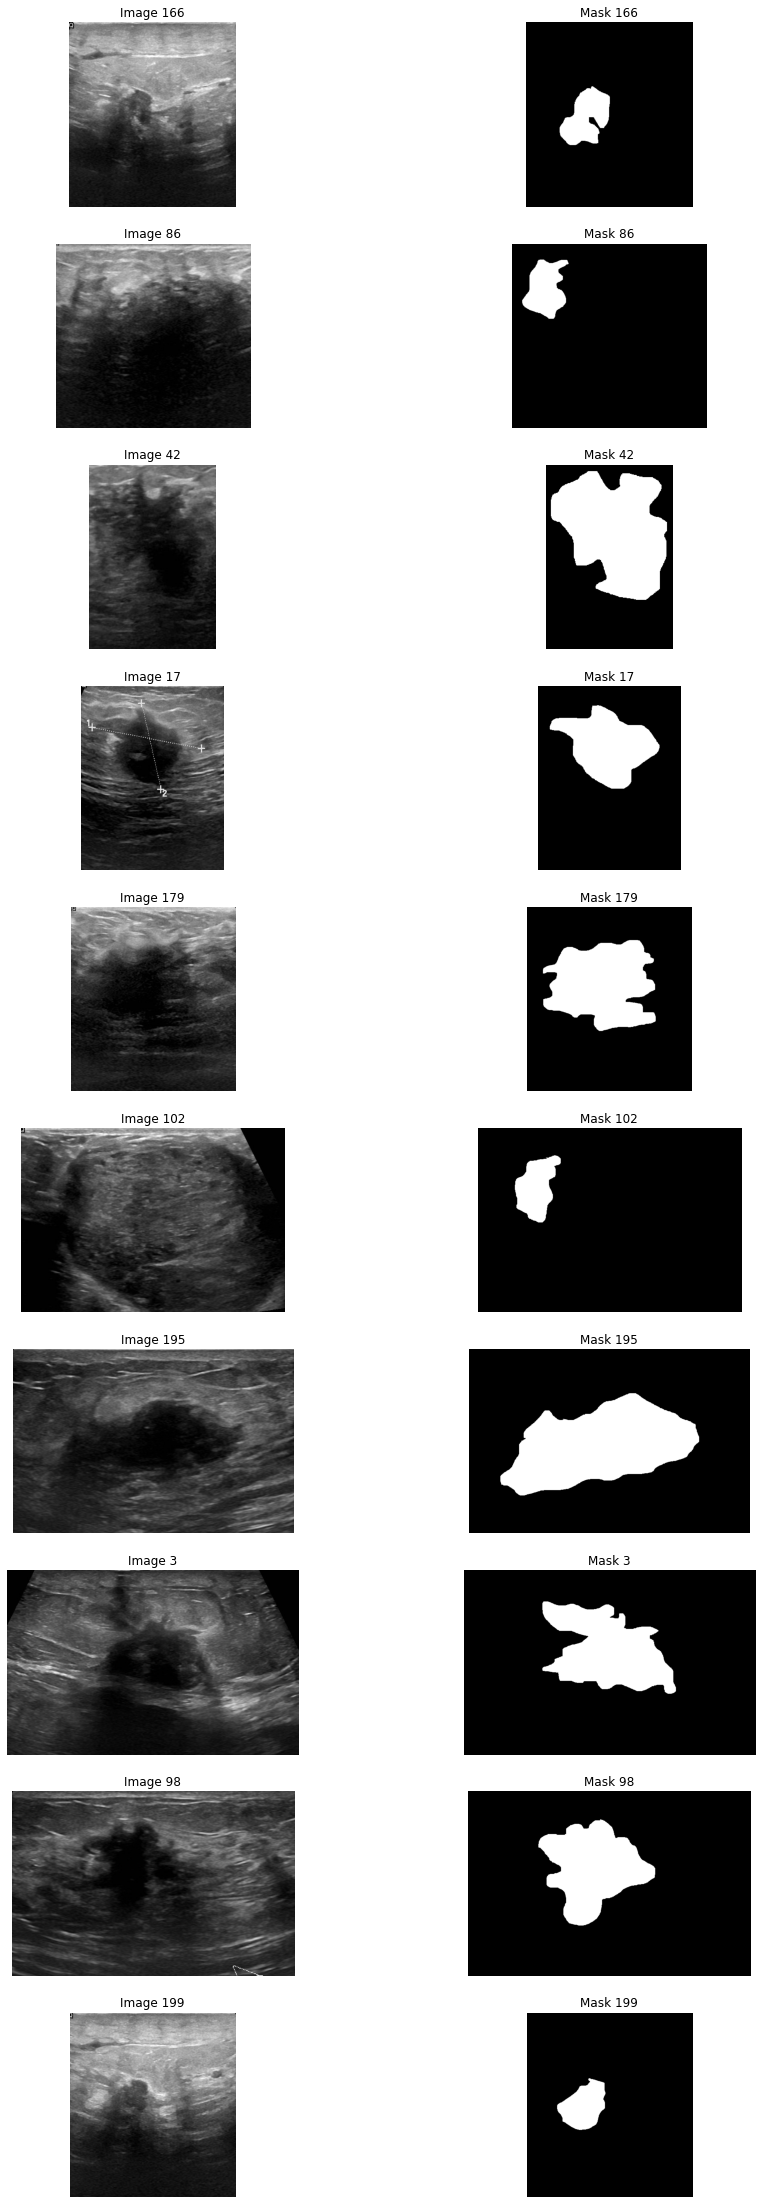

In [21]:
mali_image_proc, mali_mask_proc = segrigate_image(input_mali_proc)
show_image_and_mask(mali_image_proc, mali_mask_proc, input_mali_proc)

Images: 133, masks: 133


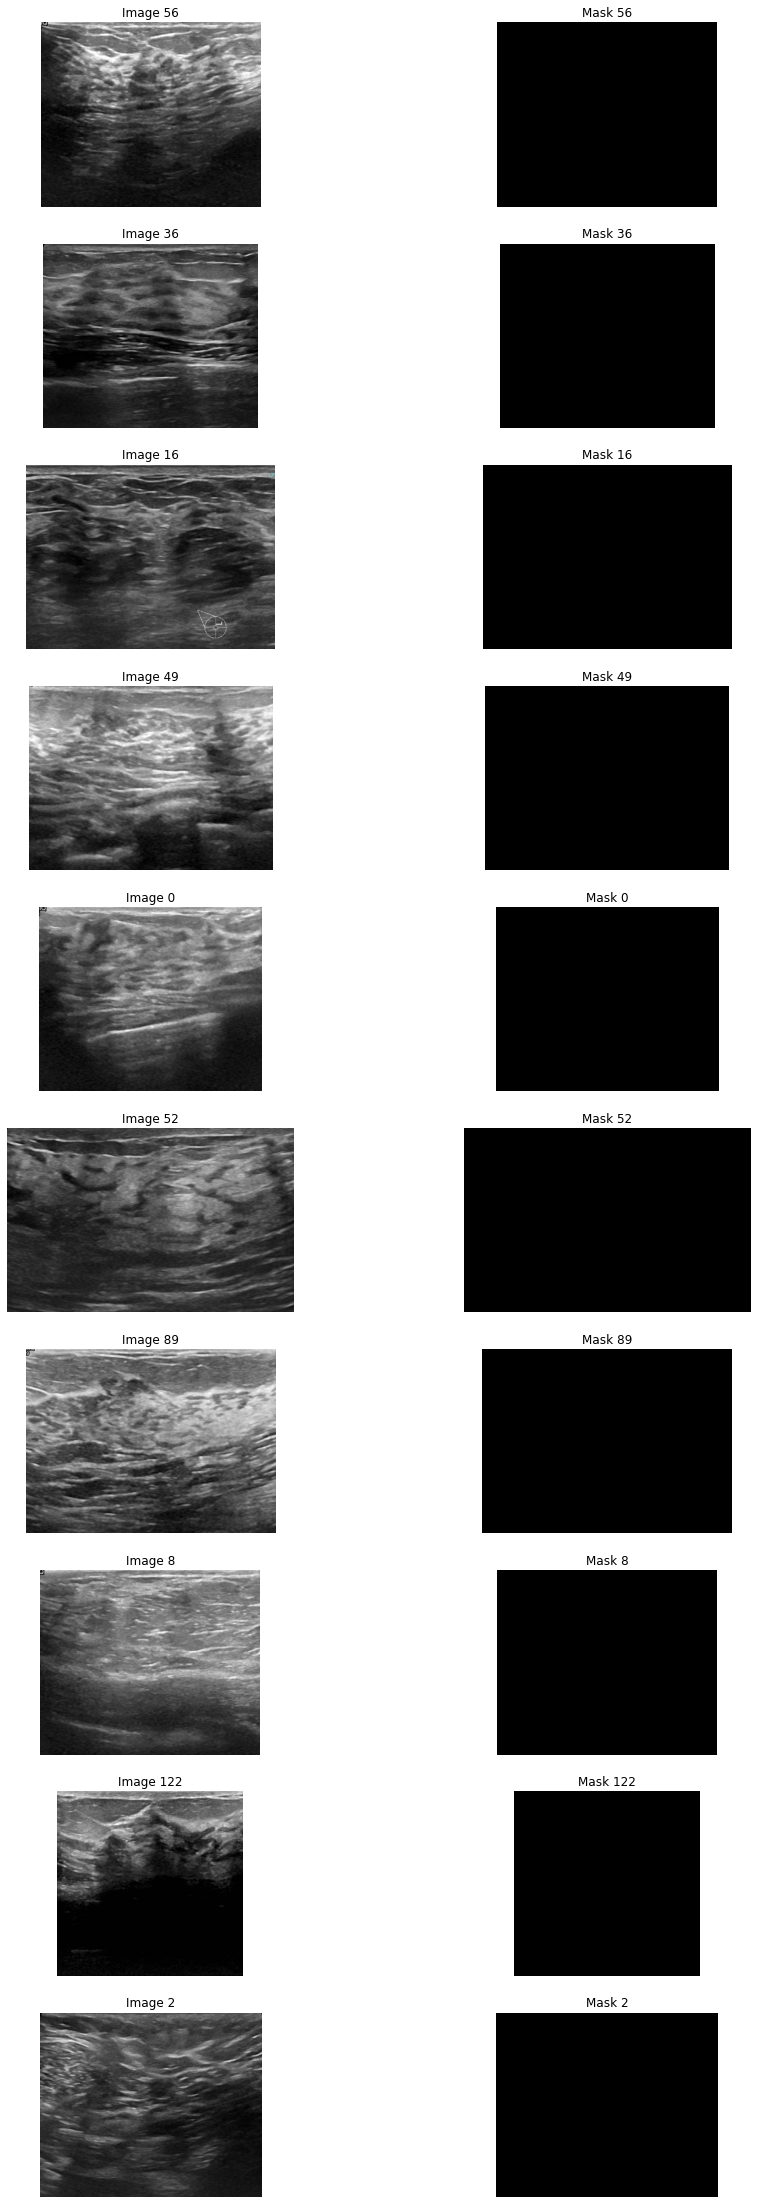

In [19]:
norm_image_proc, norm_mask_proc = segrigate_image(input_norm)
show_image_and_mask(norm_image_proc, norm_mask_proc, input_norm)